<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/SqueezeNet_AlexNet_level_accuracy_with_50x_fewer_parameters_and_%3C0_5MB_model_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SqueezeNet: AlexNet-level accuracy with 50x fewer parameters and <0.5MB model size**

논문 링크: https://arxiv.org/abs/1602.07360

지금까지의 CNN 관련 연구들을 보면 대부분 정확도를 올리는 것에 초점을 맞췄다. 하지만, 모델의 크기를 줄이고 정확도를 유지하는 연구가 많이 되지 않았다. 만일 같은 정확도에 모델이 작아진다면, 속도 등 여러 부분에서 이점을 얻게 된다.

- **More efficient distributed training.** 
data-parallel training(병렬 학습)에 굉장히 좋은 효율이 난다.
- **Less overhead when exporting new models to clients.**
자율 주행 자동차와 같이 실시간으로 서버와 소통해야 하는 경우에 큰 이점을 얻을 수 있다. 데이터 전송량이 적기 때문에 잦은 업데이트가 가능하다. AlexNet의 경우 전송량이 240MB이다.
- **Feasible FPGA and embedded deployment.**
일종의 반도체 소자인 FPGA는 보통 10MB 미만의 휘발성 메모리를 가지며 off-chip 메모리나 스토리지가 없다. 작은 모델의 경우 직접적으로 FPGA에 모델을 심을 수 있다. 또한, ASIC에 직접적으로 CNN을 배치할 수 있다.

## **SqueezeNet 구조**

본 논문에서는 SqueezeNet에 마치 ResNet에서 쓰인 residual block과 같이 모델 전체를 구성하는 Fire module이라는 block을 도입했다.

### **Fire Module**

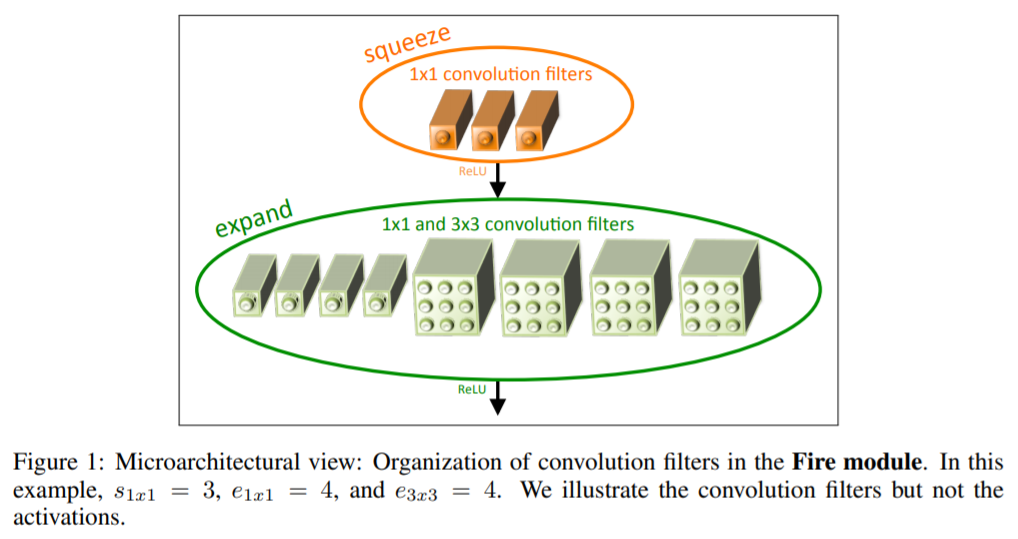

위의 그림 Figure 1과 같이 fire module은 1 x 1 filter로만 이루어져 있는 squeeze convolution layer와 이를 통과하면 다음으로 거치게 되는 1 x 1와 3 x 3 filter가 섞여있는 expand layer로 구성이 되어있다.

이때 조정할 수 있는 hyper-parameter는 
- s1x1 = squeeze layer의 1 x 1 filter의 갯수
- e1x1 = expand layer에서의 1 x 1 filter의 갯수
- e3x3 = expand layer에서의 3 x 3 filter의 갯수

위와 같이 총 3가지가 있다.

### **Architecture**

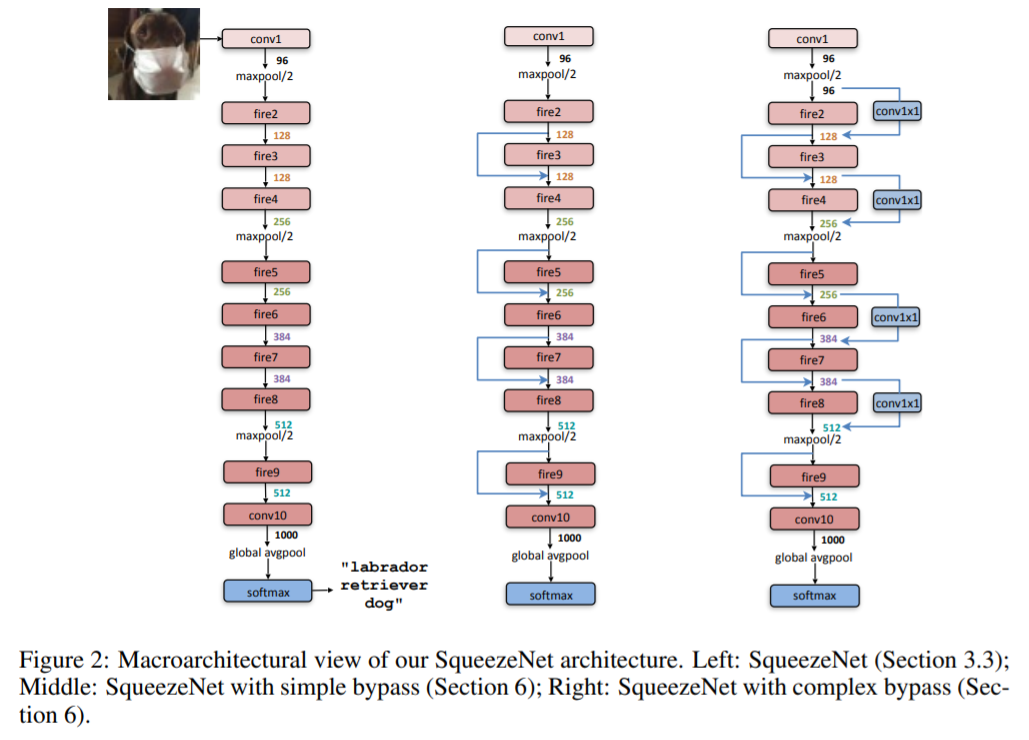

위의 그림 Figure 2를 보면 model의 자세한 구조를 알 수 있다. 1 x 1 filter와 3 x 3 filter의 output activation이 같기 때문에 expand module의 3 x 3 filter로 들어가는 데이터에 zero padding를 추가했다. 그리고 모든 layer에는 ReLU를 사용하고 fire9 이후에 dropout를 50% 적용했다.

## **Experiments**

논문의 제목에서 강조했듯이 AlexNet과 성능은 매우 비슷하다. 애초에 parameter의 수를 줄이기 위한 논문이기 때문에 연구에서는 AlexNet과 비교를 한다.

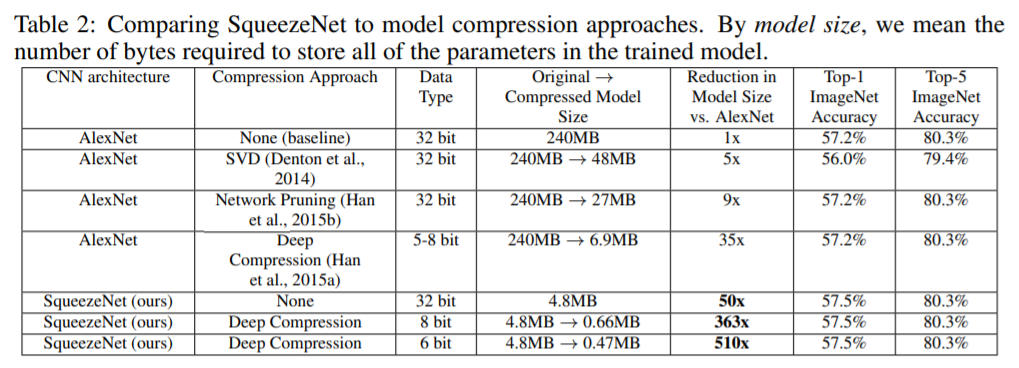

위의 표 Table 2를 보면 알 수 있듯이 AlexNet과의 accuracy를 근접하면서도 data type이나 model size를 보면 확연히 줄어든 것을 알 수 있다.

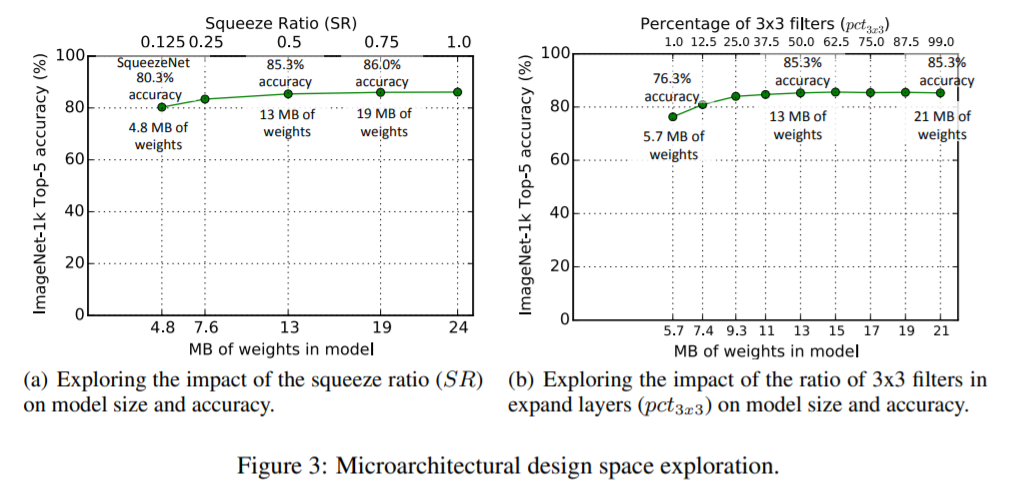

또한, 본 논문에서는 fire module에 들어가는 hyper-parameter로 실험을 진행했다. 위의 그림 Figure 3이 바로 이에 해당하는 실험 결과이다. 여기서 왼쪽 그림에 해당하는 SR은 0 ~ 1의 값을 가지며, 미리 지정해둔 expand layer filter이 전체 갯수에 곱하여 squeeze layer filter의 전체 갯수를 결정한다. 그리고 오른쪽 그림에 해당하는 pct(3x3)은 expand layer 내부에서 3 x3 filter의 비율을 결정해주는 값이다.

위의 실험을 통해 SR은 0.125를 넘어갈시 모델의 사이즈가 조금씩 커지지만 정확도 또한 같이 증가하며 0.75일때 최고점을 찍는다. 그리고 pct(3x3)의 경우 0.5를 넘어가는 순간부터 정확도는 증가하지 않으며 사이즈만 커지는 것을 알 수 있다.

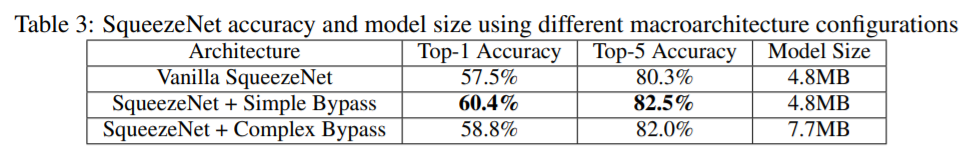

그리고 이제 위에서 살펴봤던 그림 Figure 2와 같이 모델의 전체적인 구조를 조금씩 수정하여 실험한 결과가 바로 위의 표 Table 3이다. SqueezeNet + Simple Bypass가 가장 좋은 성능을 보인 것을 알 수 있다.